In [1]:
from scipy.stats import skew, kurtosis
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pandas as pd

import keras

Using TensorFlow backend.


In [2]:
df = pd.read_csv("./data/ICICIBANK.NS_26-10-15_26-10-19.csv")
df = df['Close'][0:-1].values

stock_prices = np.reshape(df, (-1,7))
print(stock_prices.shape)
a = stock_prices
Feature_array = []
for row in range(0,a.shape[0]):
    mean = np.mean(a[row])
    f = np.array([mean])
    skewness = skew(a[row], axis=0, bias=True)
    f = np.append(f, skewness)
    kurt = kurtosis(a[row], axis=0, fisher=True, bias=True)
    f= np.append(f, kurt)
    variance = np.var(a[row])
    f = np.append(f, variance)
    std = np.std(a[row])
    f = np.append(f, std)
    x = np.arange(0,len(a[row]),1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,a[row])
    f = np.append(f, slope)
    df = pd.DataFrame({'A' : a[row]})
    f = np.append(f,df.ewm(alpha = 0.6).mean().iloc[-1,0])
    print(f)
    Feature_array.append(f)
    
Feature_array = np.asarray(Feature_array)

(118, 7)
[  2.52947854e+02  -1.51501695e-01  -1.27829579e+00   2.13395377e+01
   4.61947375e+00  -6.55892571e-01   2.53494623e+02]
[ 242.26628557    0.40989038   -1.08385207   12.74151357    3.56952568
   -1.27264236  241.24779274]
[  2.40642999e+02  -5.43273936e-01  -4.57227423e-01   4.10998164e+00
   2.02730896e+00  -2.01321714e-01   2.40083972e+02]
[  2.43922002e+02  -2.26924715e-01  -1.45403067e+00   1.73711001e+01
   4.16786517e+00  -1.73057114e+00   2.39510046e+02]
[  2.30727286e+02   1.25199951e-01  -1.66116183e+00   2.57482601e+01
   5.07427434e+00  -2.08610750e+00   2.27697585e+02]
[ 234.39600043   -0.41066812   -0.90907559   16.48198106    4.05980062
    1.68989232  238.17813518]
[ 235.55857171   -0.6525048    -0.82423419   19.13985425    4.37491191
   -1.98210861  229.99244169]
[  2.16584285e+02  -7.87829860e-01  -2.58506146e-02   3.78333115e+01
   6.15087892e+00  -2.77442825e+00   2.08635251e+02]
[  2.08915573e+02   1.85079858e-01  -1.51427169e+00   2.25995771e+01
   4.7539

In [3]:
x_train = Feature_array
y_train = stock_prices
final_units = stock_prices.shape[0] * stock_prices.shape[1]
# y_train = np.reshape(y_train, (final_units))

In [4]:
x_train = Feature_array[:94]
x_test = Feature_array[95:]
y_train = stock_prices[:94]
y_test = stock_prices[95:]

In [5]:
# y_train = np.reshape(y_train, (1,240))
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(94, 7) (23, 7)
(94, 7) (23, 7)


In [6]:
model = None
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_dim = 7, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(7))

model.summary()

filepath="weights_best.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=2, save_best_only=True, mode='max')
callbacks = [checkpoint]
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
            epochs=400,
            batch_size=16,
          validation_data = (x_test, y_test),
          callbacks = callbacks
         )
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4096      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 455       
Total params: 177,031
Trainable params: 177,031
Non-trainable params: 0
_________________________________________________________________
Train on 94 samples, validate on 23 samples
Epoch 1/400
94/94 [==============================] - 1s 8ms/step - loss: 52861.4037 - acc: 0

# Train Accuracy and plot

Test loss: 9.0576599811
Test accuracy: 0.382978724672


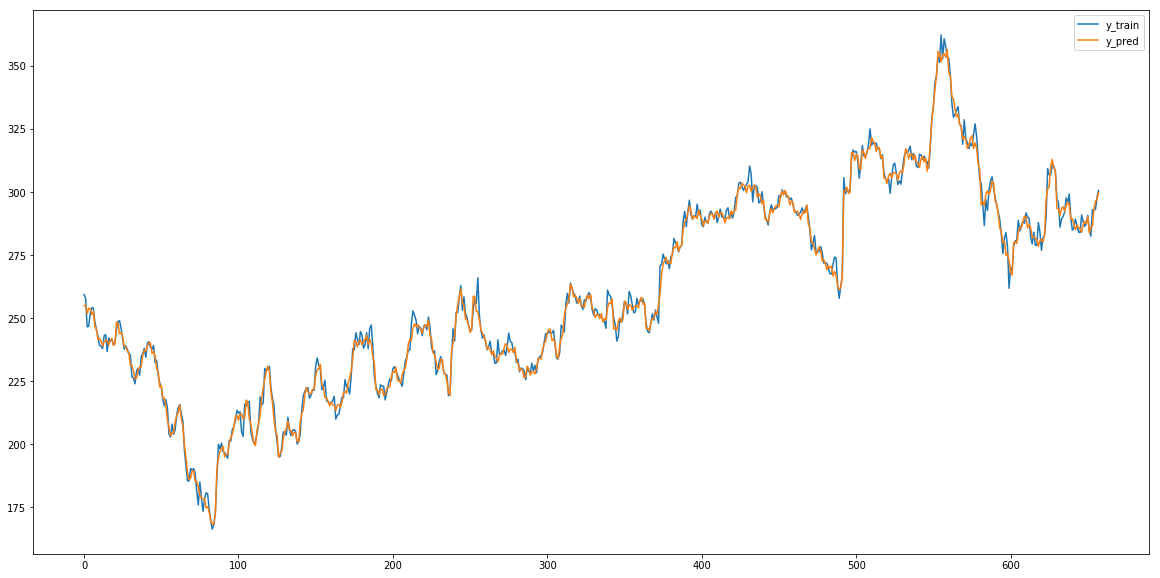

In [11]:
# Best Model
# model.load_weights(filepath)
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(x_train)
plt.figure(figsize=(20,10))
plt.plot(y_train.ravel(), label = 'y_train')
plt.plot(y_pred.ravel(), label = 'y_pred')
plt.legend()

# Test accuracy and plot

In [7]:
# Best Model
# model.load_weights(filepath)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(x_test)

Test loss: 13.8276338577
Test accuracy: 0.521739125252


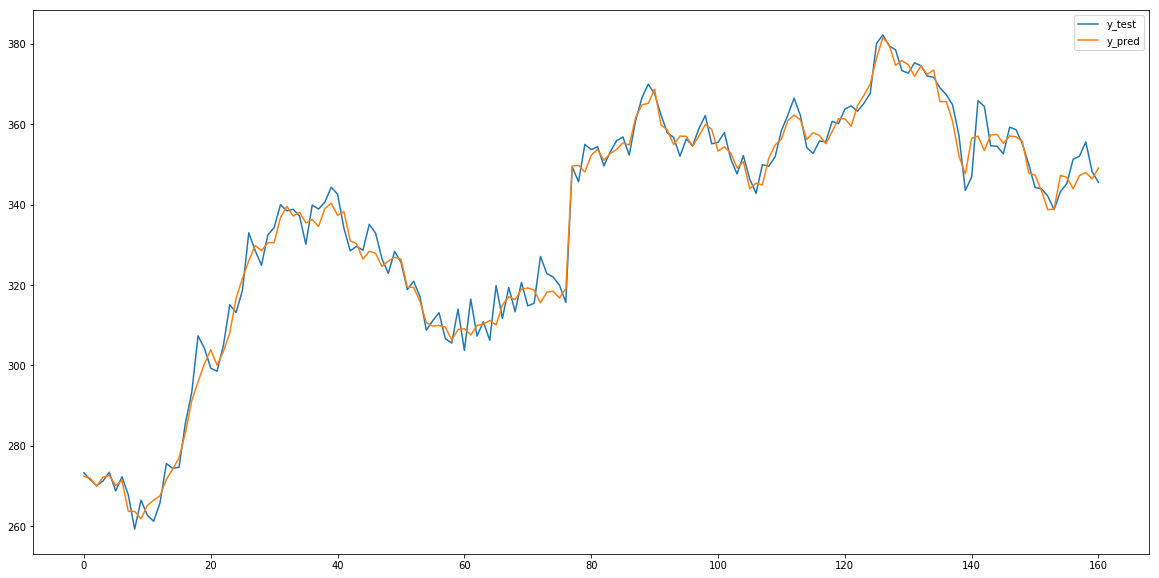

In [8]:
plt.figure(figsize=(20,10))
plt.plot(y_test.ravel(), label = 'y_test')
plt.plot(y_pred.ravel(), label = 'y_pred')
plt.legend()